# Students' dropout and Academic Success

### Project developed by:
- Pedro Jesus (up201907523)
- Sofia Germer (up201907461)
- Sérgio Estêvão (up201905680)

## Table of Contents

1. [Specification](#Specification)
2. [Related Work](#Related-work)
3. [Approach](#Approach)
4. [Required Libraries](#Required-libraries)
5. [Data Analysis](#Data-analysis)
6. [Data Preprocessing](#Data-Processing)
7. Classification

## Specification

Our approach to this problem was as follows:

1. **Data analysis:** 
2. **Algorithm implementation:**
3. **Evalutation and refinement:**

## Required Libraries

- numpy
- pandas
- matplotlib
- sklearn
- seaborn

These libraries can be installed by running the following command in the terminal:
> ``` pip install -r requirements.txt ```

## Data analysis

We start by importing the required libraries and plotting some graphs for initial analysis of the dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
import warnings
import json

warnings.filterwarnings("ignore")


dataset = pd.read_csv('data.csv', na_values=['NA'], delimiter=";")

dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
dataset_corr = dataset.corr()
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
sb.heatmap(dataset_corr, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 10});
plt.show()

### All Data Histogram

In [ ]:
dataset.hist(bins=30, figsize=(30, 16), sharey=False)

### Dropout Data Histogram

In [ ]:
dropout_data = dataset.loc[dataset["Target"] == "Dropout"]
dropout_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Graduate Data Histogram

In [ ]:
graduate_data = dataset.loc[dataset["Target"] == "Graduate"]
graduate_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Enrolled Data Histogram

In [ ]:
enrolled_data = dataset.loc[dataset["Target"] == "Enrolled"]
enrolled_data.hist(bins=30, figsize=(30, 16), sharey=False)

## Data Preprocessing

We checked the informations about the dataset and verified its consistency. After analysing the results we confirmed that there we no null values and no significant outliers, as seen in the results below, so a significant data preprocessing wasn't needed.

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.isnull().sum()

Here we split the data into input and label sets for the SciKit classifiers.

In [ ]:
dataset['Target'] = dataset['Target'].astype('category')

col_names = list(dataset.columns)
col_names.remove('Target')

inputs = dataset[col_names].values
labels = dataset['Target'].values

We decided to analyse the destribution of results and verifies a resonable class destribution.

In [ ]:
from collections import Counter

distribution_data = list(Counter(labels).values())

fig1, ax1 = plt.subplots()
colors = ( "#EEEEEE","#999999", "#333333") 
ax1.pie(distribution_data, colors = colors,labels=['Gradutated', 'Dropout', 'Enrolled'],autopct='%1.1f%%',)
ax1.axis('equal')  
plt.show()

### Train and Test split data

We used SciKit's built-in train_test_split function to generate train and test datasets. We define the training data using a 1/4 split of the entire dataset. . We use the stratify option in order to maintain the original dataset's class distribution.

In [ ]:
from sklearn.model_selection import train_test_split

(train_in,
 test_in,
 train_classes,
 test_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1, stratify=labels)

## Resampling

Our data analysis stage showed that our working dataset was umbalanced. 

We implemented both undersampling and oversampling.These techniques differ in that undersampling removes samples from majority categories, while oversampling duplicates samples from minority categories. Oversampling is generally preffered, but undersampling generates smaller and therefore less complex datasets.

We used random undersampling that randomly chooses which samples to remove.

For oversampling we used the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. This generates new samples interpolated from the existing ones.

In [ ]:
from collections import Counter

print("---Train Set---")
print(Counter(train_classes))
print("\n---Test Set---")
print(Counter(test_classes))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

us_inputs, us_labels = rus.fit_resample(train_in, train_classes)

print(Counter(us_labels))

In [ ]:
from imblearn.over_sampling import SMOTE

ros = SMOTE()

os_inputs, os_labels = ros.fit_resample(train_in, train_classes)

print(Counter(os_labels))

Some of the algorithms we plan on using (KNN and SVM) require the data to be standardized. To do so, we used a StandardScaler from SciKit Learn's preprocessing library.

In [ ]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(train_in)
train_in = scaler.fit_transform(train_in)
test_in = scaler.fit_transform(test_in)

scaler.fit(os_inputs)
os_inputs = scaler.fit_transform(os_inputs)

scaler.fit(us_inputs)
us_inputs = scaler.fit_transform(us_inputs)

# Classification

Next we used SciKit Learn's classification algorithm implementations to classify our data:

- Decision Tree Classifier
- Neural Networks
- K-Nearest Neighbors
- Support Vector Machines
- Multilayer Perceptron (NN)

## Decision Tree Classifier

### Normal Executions:

- #### Original Dataset

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(train_in, train_classes)
dtc_prediction = dtc.predict(test_in)

dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_og_report.json", "w") as outfile: 
    json.dump(dtc_classification_report, outfile)

- #### Undersampled Dataset

In [ ]:
dtc.fit(us_inputs, us_labels)
dtc_prediction = dtc.predict(test_in)

dtc_us_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_us_report.json", "w") as outfile: 
    json.dump(dtc_us_classification_report, outfile)

- #### Oversampled Dataset

In [ ]:
dtc.fit(os_inputs, os_labels)
dtc_prediction = dtc.predict(test_in)

dtc_os_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_os_report.json", "w") as outfile: 
    json.dump(dtc_os_classification_report, outfile)

### Parameter Tuning

#### GridSearchCV Setup

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [2,4,6,8,10,12,14,16,18],
                   'max_features':[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 
                  31, 32, 33, 34, 35, 36, 37]}
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=parameter_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

- #### Original Dataset

In [ ]:
grid_search.fit(train_in, train_classes)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_og_tunning_report.json", "w") as outfile: 
    json.dump(best_dtc_classification_report, outfile)

- #### Undersampled Dataset

In [ ]:
grid_search.fit(us_inputs, us_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_us_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_us_tunning_report.json", "w") as outfile: 
    json.dump(best_us_dtc_classification_report, outfile)

- #### Oversampled Dateset

In [ ]:
grid_search.fit(os_inputs, os_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")


dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_os_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_os_tunning_report.json", "w") as outfile: 
    json.dump(best_os_dtc_classification_report, outfile)

## Neural Networks

### Normal Executions:

- #### Original Dataset

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import json


mlp = MLPClassifier()

mlp.fit(train_in, train_classes)
mlp_prediction = mlp.predict(test_in)

mlp_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_og_report.json", "w") as outfile: 
    json.dump(mlp_classification_report, outfile)

- #### Undersampled Dataset

In [ ]:
mlp.fit(us_inputs, us_labels)
mlp_prediction = mlp.predict(test_in)

mlp_us_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_us_report.json", "w") as outfile: 
    json.dump(mlp_us_classification_report, outfile)

- #### Oversampled Dataset

In [ ]:
mlp.fit(os_inputs, os_labels)
mlp_prediction = mlp.predict(test_in)

mlp_os_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_os_report.json", "w") as outfile: 
    json.dump(mlp_os_classification_report, outfile)

### Parameter Tuning

#### GridSearchCV Setup

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'hidden_layer_sizes': [50, 100, 150],
                  'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                  'alpha': [0.0001, 0.001, 0.01], 
                  'solver': [' sgd', 'lbfgs', 'adam'],
                  'max_iter' : [500]}

grid_search_cv = GridSearchCV(MLPClassifier(),
                           param_grid=parameter_grid,
                           cv=10,
                           verbose=1,
                           n_jobs=-1)

- #### Original DataSet

In [ ]:
grid_search_cv.fit(train_in, train_classes)
print(f"Best score: {grid_search_cv.best_score_}")
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best estimator: {grid_search_cv.best_estimator_}")

nn = grid_search_cv.best_estimator_
nn_prediction = nn.predict(train_in)
best_report = classification_report(train_classes, nn_prediction, output_dict=True)

print("Improved original dataset")
print(f"(Confusion matrix: \n{confusion_matrix(train_classes, nn_prediction)}\n\nClassification report:\n {classification_report(train_classes, nn_prediction)}\n")

with open("./reports/mlp_og_tunning_report.json", "w") as outfile:
    json.dump(best_report, outfile)

- #### Undersampled Dataset

In [ ]:
grid_search_cv.fit(us_inputs, us_labels)
print(f"Best score: {grid_search_cv.best_score_}")
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best estimator: {grid_search_cv.best_estimator_}")

nn = grid_search_cv.best_estimator_
nn_prediction = nn.predict(us_inputs)
best_report = classification_report(us_labels, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"\n Confusion matrix: \n{confusion_matrix(us_labels, nn_prediction)}\n\nClassification report:\n {classification_report(us_labels, nn_prediction)}\n")

with open("./reports/mlp_us_tunning_report.json", "w") as outfile:
    json.dump(best_report, outfile)

- #### Oversampled Dataset

In [ ]:
grid_search_cv.fit(os_inputs, os_labels)
print(f"Best score: {grid_search_cv.best_score_}")
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best estimator: {grid_search_cv.best_estimator_}")

nn = grid_search_cv.best_estimator_
nn_prediction = nn.predict(os_inputs)
best_report = classification_report(os_labels, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"Confusion matrix: \n{confusion_matrix(os_labels, nn_prediction)}\n\nClassification report:\n {classification_report(os_labels, nn_prediction)}\n")

with open("./reports/mlp_os_tunning_report.json", "w") as outfile:
    json.dump(best_report, outfile)

## K-Nearest Neighbors

## Support Vector Machines

## Results Analysis

In [19]:
#Dar load de todos os results.json


#DTC
with open("./reports/dtc_og_report.json") as json_file:
    dtc_classification_report = json.load(json_file)
with open("./reports/dtc_us_report.json") as json_file:
    dtc_us_classification_report = json.load(json_file)
with open("./reports/dtc_os_report.json") as json_file:
    dtc_os_classification_report = json.load(json_file)

with open("./reports/dtc_og_tunning_report.json") as json_file:
    dtc_tunning_classification_report = json.load(json_file)
with open("./reports/dtc_us_tunning_report.json") as json_file:
    dtc_us_tunning_classification_report = json.load(json_file)
with open("./reports/dtc_os_tunning_report.json") as json_file:
    dtc_os_tunning_classification_report = json.load(json_file)

#NeuralNetwork
with open("./reports/mlp_og_report.json") as json_file:
    mlp_classification_report = json.load(json_file)
with open("./reports/mlp_us_report.json") as json_file:
    mlp_us_classification_report = json.load(json_file)
with open("./reports/mlp_os_report.json") as json_file:
    mlp_os_classification_report = json.load(json_file)

with open("./reports/mlp_og_tunning_report.json") as json_file:
    mlp_tunning_classification_report = json.load(json_file)
with open("./reports/mlp_us_tunning_report.json") as json_file:
    mlp_us_tunning_classification_report = json.load(json_file)
with open("./reports/mlp_os_tunning_report.json") as json_file:
    mlp_os_tunning_classification_report = json.load(json_file)

#K-Nearest Neighbors

#Support Vector Machines

### Accuracy Comparison

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,) and requested shape (2,)

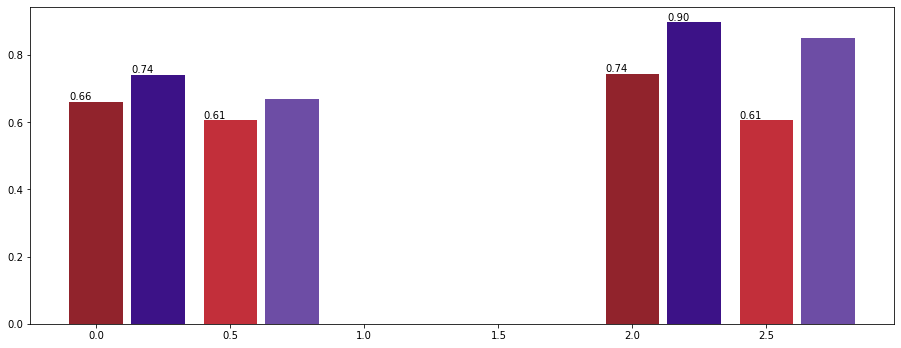

In [23]:
prediction_data = [
    [dtc_classification_report['accuracy'], mlp_classification_report['accuracy']],
    [dtc_tunning_classification_report['accuracy'], mlp_tunning_classification_report['accuracy']],
    [dtc_us_classification_report['accuracy'], dtc_us_classification_report['accuracy']],
    [dtc_us_tunning_classification_report['accuracy'], mlp_us_tunning_classification_report['accuracy']],
    [dtc_os_classification_report['accuracy'], mlp_os_classification_report['accuracy']],
    [dtc_os_tunning_classification_report['accuracy'], mlp_os_tunning_classification_report['accuracy']],
]

X = np.arange(0,4,2)
fig = plt.figure()
ax = fig.add_axes([0,0,])

ax.bar(X, prediction_data[0], color='#91232C', width=0.2)
for i in range(2):
    plt.text(X[i] - 0.1, prediction_data[0][i] + 0.005, f"{prediction_data[0][i]:.2f}")
ax.bar(X + 0.23, prediction_data[1], color='#3C1287', width=0.2)
for i in range(2):
    plt.text(X[i] + 0.13, prediction_data[1][i] + 0.005, f"{prediction_data[1][i]:.2f}")

ax.bar(X + 0.5, prediction_data[2], color='#C22F3A', width=0.2)
for i in range(2):
    plt.text(X[i] + 0.4, prediction_data[2][i] + 0.005, f"{prediction_data[2][i]:.2f}")
ax.bar(X + 0.73, prediction_data[3], color='#6D4DA5', width=0.2, tick_label=['DT', 'KNN', 'SVM', 'NN'])
for i in range(2):
    plt.text(X[i] + 0.63, prediction_data[3][i] + 0.005, f"{prediction_data[3][i]:.2f}")

ax.bar(X + 1, prediction_data[4], color='#D68C92', width=0.2)
for i in range(2):
    plt.text(X[i] + 0.9, prediction_data[4][i] + 0.005, f"{prediction_data[4][i]:.2f}")
ax.bar(X + 1.23, prediction_data[5], color='#CEC4E1', width=0.2)
for i in range(2):
    plt.text(X[i] + 1.13, prediction_data[5][i] + 0.005, f"{prediction_data[5][i]:.2f}")

ax.set_ylim(ymin=0)

original = mpatches.Patch(color='#91232C', label='Original')
best_og = mpatches.Patch(color='#3C1287', label='GS-Original')
undersampled = mpatches.Patch(color='#C22F3A', label='Undersampling')
best_us = mpatches.Patch(color='#6D4DA5', label='GS-Undersampling')
oversampled = mpatches.Patch(color='#D68C92', label='Oversampling')
best_os = mpatches.Patch(color='#CEC4E1', label='GS-Oversampling')
plt.legend(handles=[original, best_og, undersampled, best_us, oversampled, best_os], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy by algorithm")

plt.show()